План работы над проектом: HR-аналитика для оптимизации управления персоналом

---

**Задача 1: Предсказание уровня удовлетворённости сотрудника**

1. Загрузка данных  
   - Загрузить обучающую и тестовую выборки  
   - Ознакомиться с признаками и целевой переменной

2. Предобработка данных  
   - Проверить данные на пропуски, выбросы и аномалии  
   - Заполнить пропуски, преобразовать типы данных

3. Исследовательский анализ данных (EDA)  
   - Изучить распределения признаков и целевой переменной  
   - Оценить корреляции  
   - Сделать выводы для подготовки данных

4. Подготовка данных  
   - Настроить пайплайн предобработки  
   - Кодировать категориальные признаки (использовать минимум два метода)  
   - Масштабировать числовые признаки

5. Обучение моделей  
   - Обучить как минимум две модели (например, линейную и дерево решений)  
   - Подобрать гиперпараметры хотя бы для одной из моделей  
   - Оценить качество моделей с помощью метрики SMAPE  
   - Выбрать лучшую модель (критерий: SMAPE ≤ 15 на тестовой выборке)

6. Оформление выводов  
   - Сравнить результаты моделей  
   - Объяснить, почему одна модель показала лучший результат

---

**Задача 2: Предсказание увольнения сотрудника из компании**

1. Загрузка данных  
   - Загрузить обучающую и тестовую выборки  
   - Ознакомиться с признаками и целевой переменной (quit)

2. Предобработка данных  
   - Обработать пропуски и аномалии

3. Исследовательский анализ данных  
   - Составить портрет "уволившегося сотрудника"  
   - Сравнить распределения признаков между ушедшими и оставшимися  
   - Проверить гипотезу о влиянии job_satisfaction_rate на увольнение

4. Добавление нового признака  
   - Если гипотеза подтвердилась, добавить предсказанный job_satisfaction_rate из первой задачи к признакам второй

5. Подготовка данных  
   - Настроить пайплайн подготовки, кодирование, масштабирование

6. Обучение моделей  
   - Обучить минимум три модели  
   - Подобрать гиперпараметры минимум для двух  
   - Оценить качество по ROC-AUC  
   - Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке

7. Выводы  
   - Сравнить результаты  
   - Объяснить, какая модель справилась лучше и почему

---

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -U scikit-learn

**Импорт библиотек**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phik
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Задача №1

### Загрузка данных

In [5]:
train_job = pd.read_csv("/datasets/train_job_satisfaction_rate.csv")
test_data = pd.read_csv("/datasets/test_features.csv")
test_target = pd.read_csv("/datasets/test_target_job_satisfaction_rate.csv")

In [6]:
test = test_data.merge(test_target, on='id', how='right')

### Предобработка данных

#### Предобработка данных из файла `train_job_satisfaction_rate.csv`

In [7]:
train_job.head(15)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


**Комментарий**: Все признаки соответствуют заявленным. Однако, можно было бы заменить `_` в названиях колонок на обычный пробел.

In [8]:
train_job.columns = train_job.columns.str.replace('_', ' ')

In [9]:
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment years       4000 non-null   int64  
 5   last year promo        4000 non-null   object 
 6   last year violations   4000 non-null   object 
 7   supervisor evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job satisfaction rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


**Комментарий**: Все типы данных в порядке

In [10]:
train_job.duplicated().sum()

0

**Комментарий**: Нет `явных` дубликатов

In [11]:
train_job.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment years         0
last year promo          0
last year violations     0
supervisor evaluation    0
salary                   0
job satisfaction rate    0
dtype: int64

**Комментарий**: Есть пропуски - `6` пропусков в колонке с информацией в каком отделе работает сотрудник и `4` в колнке с уровнем занимаемой сотрудником должности.

In [12]:
display('dept', train_job['dept'].value_counts())
display('level', train_job['level'].value_counts())
display('workload', train_job['workload'].value_counts())
display('last year promo', train_job['last year promo'].value_counts())
display('last year violations', train_job['last year violations'].value_counts())

'dept'

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

'level'

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

'workload'

medium    2066
low       1200
high       734
Name: workload, dtype: int64

'last year promo'

no     3880
yes     120
Name: last year promo, dtype: int64

'last year violations'

no     3441
yes     559
Name: last year violations, dtype: int64

**Комментарий**: Неявных дубликатов не обнаружено.

In [13]:
train_job['level'] = train_job['level'].replace('sinior', 'senior')

#### Предобработка данных из файла `test_features.csv`

In [14]:
test.head(15)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,130604,technology,junior,medium,1,no,no,4,34800,0.74
1,825977,marketing,middle,high,7,no,no,5,58800,0.75
2,418490,purchasing,junior,low,1,no,no,4,19200,0.60
3,555320,technology,junior,medium,1,no,no,4,34800,0.72
4,826430,technology,junior,medium,1,no,yes,2,30000,0.08
5,817219,technology,junior,medium,2,no,no,5,31200,0.76
6,269033,hr,junior,medium,1,no,no,4,27600,0.64
7,962356,technology,middle,high,2,no,no,3,56400,0.38
8,649052,technology,middle,medium,2,no,yes,3,45600,0.14
9,532834,sales,middle,medium,4,no,no,4,38400,0.59


**Комментарий**: Будет проведена замена символа `_` в названиях столбцов на пробел

In [15]:
test.columns = test.columns.str.replace('_', ' ')

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment years       2000 non-null   int64  
 5   last year promo        2000 non-null   object 
 6   last year violations   2000 non-null   object 
 7   supervisor evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job satisfaction rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


**Комментарий**: Все типы данных соответствуют данным.

In [17]:
test.duplicated().sum()

0

**Комментарий**: `Явных` дубликатов нет

In [18]:
test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment years         0
last year promo          0
last year violations     0
supervisor evaluation    0
salary                   0
job satisfaction rate    0
dtype: int64

**Комментарий**: В данных есть пропуски в признаках: `dept`(2) и `level`(1).

In [19]:
display('dept', test['dept'].value_counts())
display('level', test['level'].value_counts())
display('workload', test['workload'].value_counts())
display('last year promo', test['last year promo'].value_counts())
display('last year violations', test['last year violations'].value_counts())

'dept'

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

'level'

junior    974
middle    854
sinior    171
Name: level, dtype: int64

'workload'

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

'last year promo'

no     1937
yes      63
Name: last year promo, dtype: int64

'last year violations'

no     1738
yes     262
Name: last year violations, dtype: int64

**Комментарий**: В данных затерялись два пропуска, то есть вместо пустого значения стоит ` `, такая ситуация наблюдается по одному разу в колонках `dept` и `workload`. Т.к. случаи разовые, их заполним популярными значениями

In [20]:
test['level'] = test['level'].replace('sinior', 'senior')

#### Вывод после предобработки данных

---
- **Файл `train_job_satisfaction_rate.csv`** - Была проведена замена символа `_` на пробел, было выявлено `10` пропусков в колонках `dept` и `level`, все `10` строк с пропусками были удалены из таблицы, т.к. составляли менее `1%` от всех данных. Явных и неявных дубликатов не было обнаружено.
- **Файлы `test_features.csv` и `test_target_job_satisfaction_rate.csv`** -  Была проведена замена символа `_` на пробел, было выявлено `3` пропуска в колонках `dept` и `level`, все `3` строки были заполнены самыми популярными значения. Явных дубликатов не было обнаружено, однако было обнаружено `2` ошибочных значения в колонках `dept` и `workload`, в каждой колонке было по одному значению - ` `, строки с жтими значениями были удалены.
---

### Исследовательский анализ данных

#### Исследовательский анализ данных из файла `train_job_satisfaction_rate.csv`

In [21]:
train_job.describe()

,id,employment years,supervisor evaluation,salary,job satisfaction rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


**Теперь визуализация**

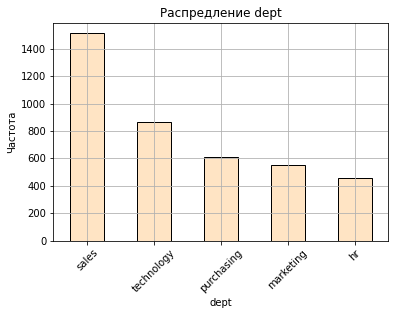

In [22]:
train_job['dept'].value_counts().plot(kind='bar', color='bisque', edgecolor='black')
plt.title('Распредление dept')
plt.xlabel('dept')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: На графике распределения признака `dept` видно, что больше всего сотрудников в отделе продаж (около `1500`). Меньше всего людей в `marketing` и `hr` (`500`-`550`).

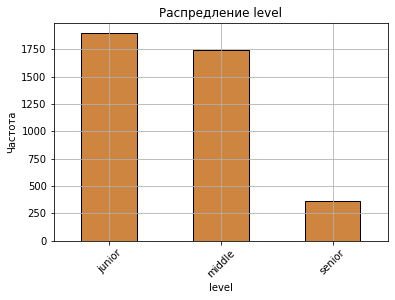

In [23]:
train_job['level'].value_counts().plot(kind='bar', color='peru', edgecolor='black')
plt.title('Распредление level')
plt.xlabel('level')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Исходя из графика распределения уровня должности, можно сказать, что в компании больше всего неопытных или недавно работающих сотрудников (около `3450`), а сотрдуников с большим опытом всего около `300`

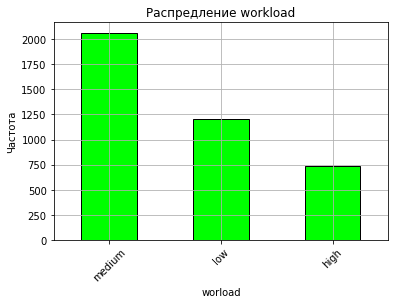

In [24]:
train_job['workload'].value_counts().plot(kind='bar', color='lime', edgecolor='black')
plt.title('Распредление workload')
plt.xlabel('worload')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Большинство сотрудников имеют средний уровень загруженности, меньше всего сотрудников с выскокой загруженностью(около `750`)

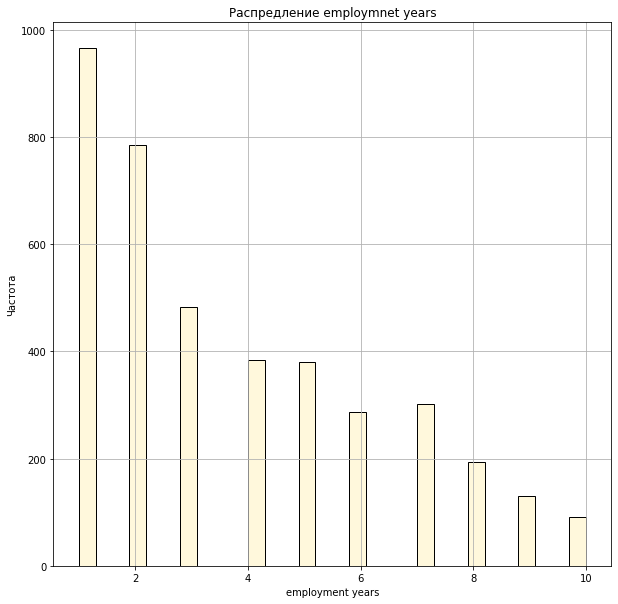

In [25]:
plt.figure(figsize=(10,10))
plt.hist(train_job['employment years'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление employmnet years')
plt.xlabel('employment years')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: В компании действительно много новых сотрудников, около `1700` сотрудников работают в компании не более `2-ух` лет. Людей работающих в компании от `3-ех` лет меньше, чем новых сотрудников, а сотрудников работающих более 8 лет совсем мало - около `500` человек

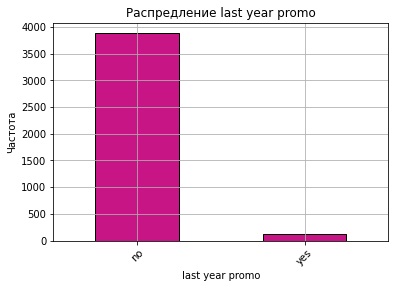

In [26]:
train_job['last year promo'].value_counts().plot(kind='bar', color='mediumvioletred', edgecolor='black')
plt.title('Распредление last year promo')
plt.xlabel('last year promo')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: График распределения наличия повышения за последний год показывает, что подавляющее число сотрудников(`~3800`) не получало повышение за последний год, лишь около `100` сотрудников были повышены за последний год

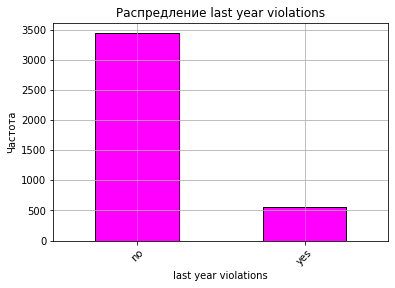

In [27]:
train_job['last year violations'].value_counts().plot(kind='bar', color='fuchsia', edgecolor='black')
plt.title('Распредление last year violations')
plt.xlabel('last year violations')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Исходя из графика распределения наличия нарушений трудового договора, видно, что большинство сотрудников (`3450`) не нарушали трудовой договор в течении года, однако около `500` сотрудников нарушили трудовой договор за последний год

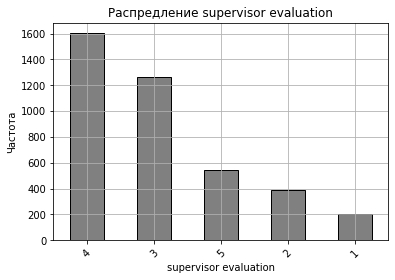

In [28]:
train_job['supervisor evaluation'].value_counts().plot(kind='bar', color='gray', edgecolor='black')
plt.title('Распредление supervisor evaluation')
plt.xlabel('supervisor evaluation')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: График распределения оценки качества работы сотрудника показывает, что большинство сотрудников получили от руководителя оценку `4` или `3`, таких сотрудников около `1850`. Сотрудников получивших оценки `1`, `2` или `5` намного меньше, около `1150`.

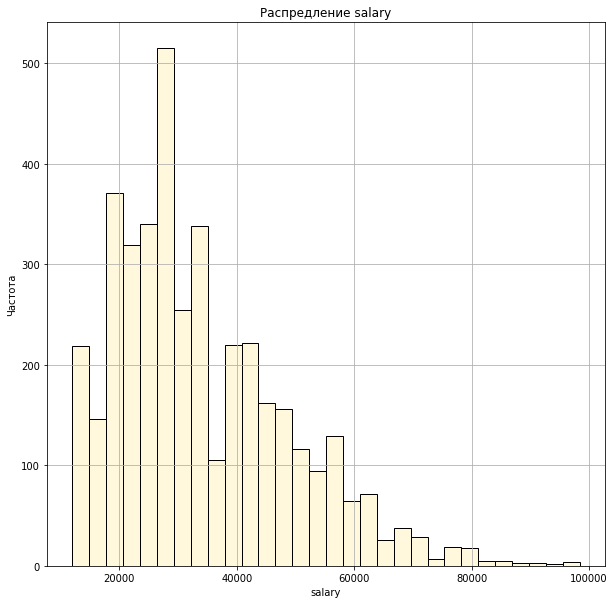

In [29]:
plt.figure(figsize=(10,10))
plt.hist(train_job['salary'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление salary')
plt.xlabel('salary')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комменатрий**: График распределения заработной платы сотрудников показывает, что большинство сотрудников получают от `20000` до `30000`, общий диапозон значений расположен от `10000` до `10000`. Меньше всего сотрудников получающих более `60000`

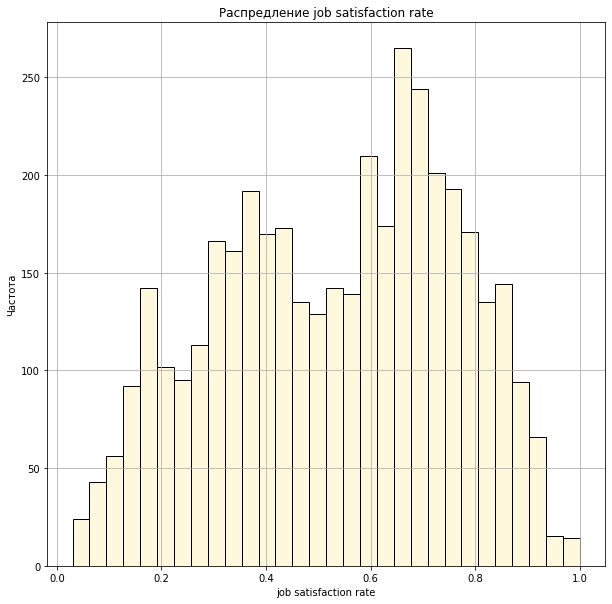

In [30]:
plt.figure(figsize=(10,10))
plt.hist(train_job['job satisfaction rate'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление job satisfaction rate')
plt.xlabel('job satisfaction rate')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комменатрий**: Исходя из графика распределения уровня удовлетворённости сотрудника можно сказать, что чаще всего сотруднику дают оценку около `0.3`-`0.4` и около `0.6`-`0.7`

#### Исследовательский анализ данных из файлов `test_features.csv` и `test_target_job_satisfaction_rate.csv`

In [31]:
test.describe()

,id,employment years,supervisor evaluation,salary,job satisfaction rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,552765.213500,3.666500,3.526500,34066.800000,0.54878
std,253851.326129,2.537222,0.996892,15398.436729,0.22011
min,100298.000000,1.000000,1.000000,12000.000000,0.03000
25%,339052.000000,1.000000,3.000000,22800.000000,0.38000
50%,550793.000000,3.000000,4.000000,30000.000000,0.58000
75%,765763.750000,6.000000,4.000000,43200.000000,0.72000
max,999029.000000,10.000000,5.000000,96000.000000,1.00000


**Графики**

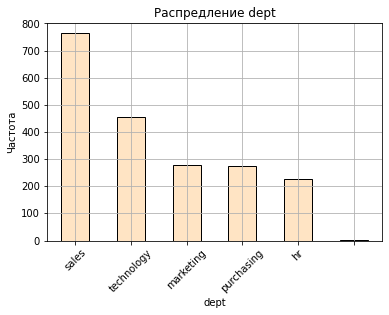

In [32]:
test['dept'].value_counts().plot(kind='bar', color='bisque', edgecolor='black')
plt.title('Распредление dept')
plt.xlabel('dept')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Как и в первом файле больше сотрудников работаю с продажами, а меньше всего людей в отделах `marketing`, `purchasing` и `hr`

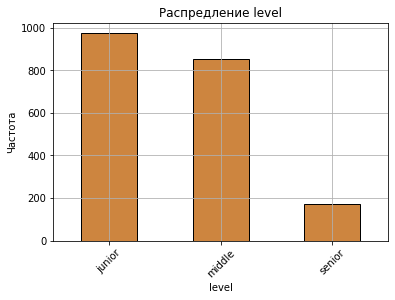

In [33]:
test['level'].value_counts().plot(kind='bar', color='peru', edgecolor='black')
plt.title('Распредление level')
plt.xlabel('level')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: На графике распределения уровня должности та же ситуация, что в первом файле-больше всего неопытных и недавно работающих в компании сотрудников, а сотрудников с опытом и на высоком уровне намного меньшше.

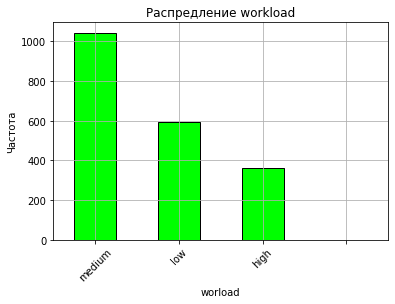

In [34]:
test['workload'].value_counts().plot(kind='bar', color='lime', edgecolor='black')
plt.title('Распредление workload')
plt.xlabel('worload')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Вновь график показывают абсолютно такую ситуацию как и в первом файле, большинство со средней загруженостью, а меньше всего сотрудников с высокой загруженностью

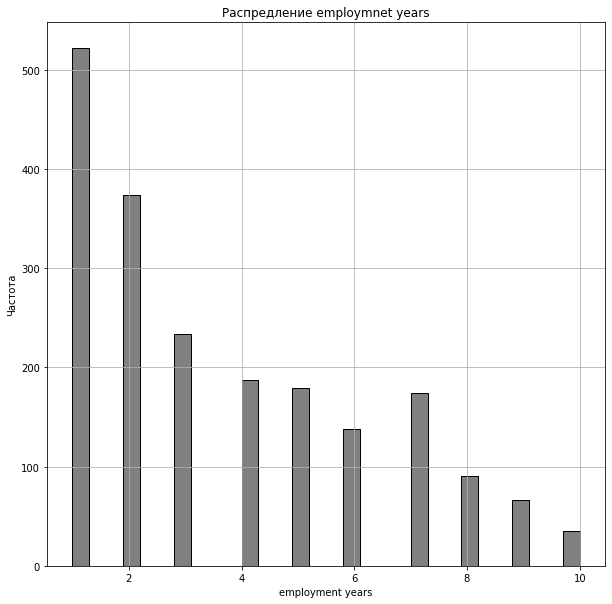

In [35]:
plt.figure(figsize=(10,10))
plt.hist(test['employment years'], bins=30, color='grey', edgecolor='black')
plt.title('Распредление employmnet years')
plt.xlabel('employment years')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: С распределением длительности работы в компании такая же ситуация как и в первом файле, больше всего новых сотрудников, а опытных намного меньше.

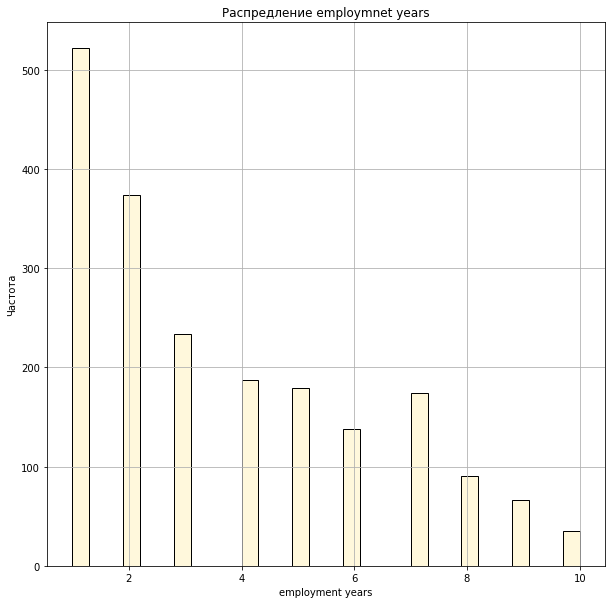

In [36]:
plt.figure(figsize=(10,10))
plt.hist(test['employment years'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление employmnet years')
plt.xlabel('employment years')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: Вновь совпадение с первым файлом, больше всего новичков, а людей работающих более 3 лет намного меньше. Тех кто в компании более 8 лет во много раз меньше, чем новых сотрудников.

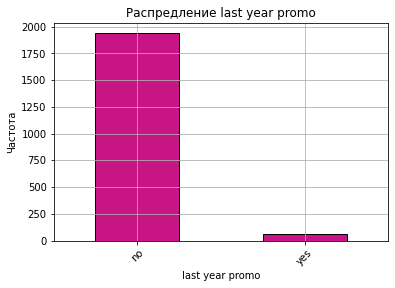

In [37]:
test['last year promo'].value_counts().plot(kind='bar', color='mediumvioletred', edgecolor='black')
plt.title('Распредление last year promo')
plt.xlabel('last year promo')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Снова людей получивших повышение за последний год во много раз меньше, чем тех кто остался на своей должности.

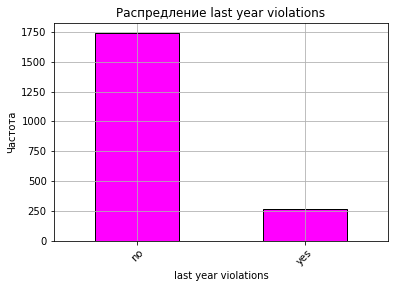

In [38]:
test['last year violations'].value_counts().plot(kind='bar', color='fuchsia', edgecolor='black')
plt.title('Распредление last year violations')
plt.xlabel('last year violations')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Как и с первым файлом, человек нарушивших трудовой договор во много раз меньше, чем тех кто его соблюдал

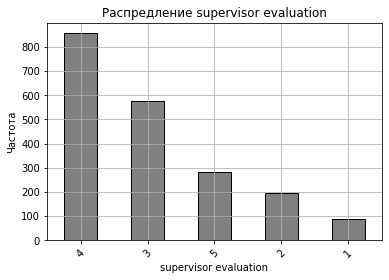

In [39]:
test['supervisor evaluation'].value_counts().plot(kind='bar', color='gray', edgecolor='black')
plt.title('Распредление supervisor evaluation')
plt.xlabel('supervisor evaluation')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Также как и в первом файле, больше всего сотрудников получают оценки `4` или `3`, реже всего `2` или `1`

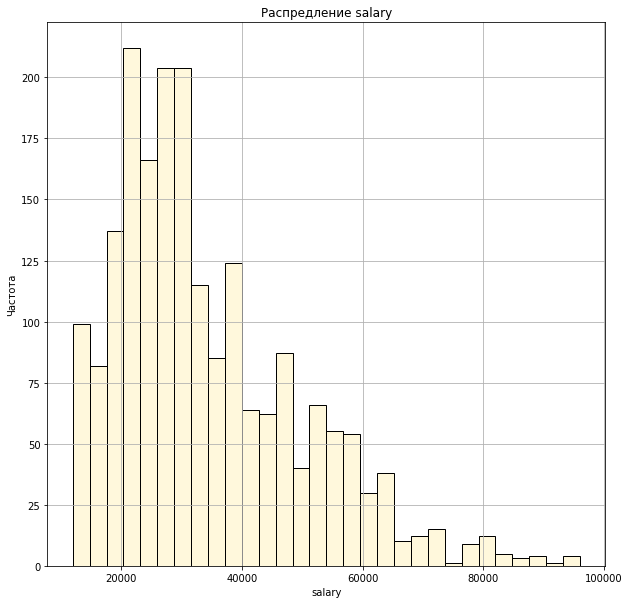

In [40]:
plt.figure(figsize=(10,10))
plt.hist(test['salary'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление salary')
plt.xlabel('salary')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: Вновь также как и в первом файле, сотрудников с зарплатой `20000`-`30000` больше всего.

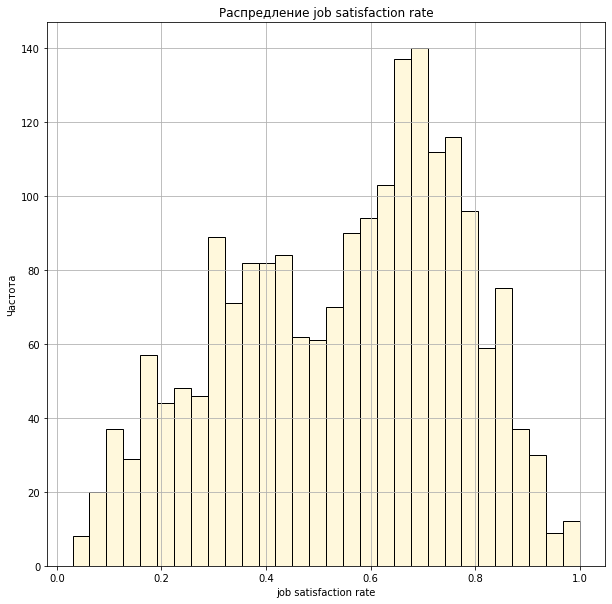

In [41]:
plt.figure(figsize=(10,10))
plt.hist(test['job satisfaction rate'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление job satisfaction rate')
plt.xlabel('job satisfaction rate')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: График распределения оценки сотруднииков, показывает, что большинство сотрудников дают оценку от `0.3` до `0.4` или от `0.6` до `0.7`, все как и в первом файле

#### Анализ корреляций

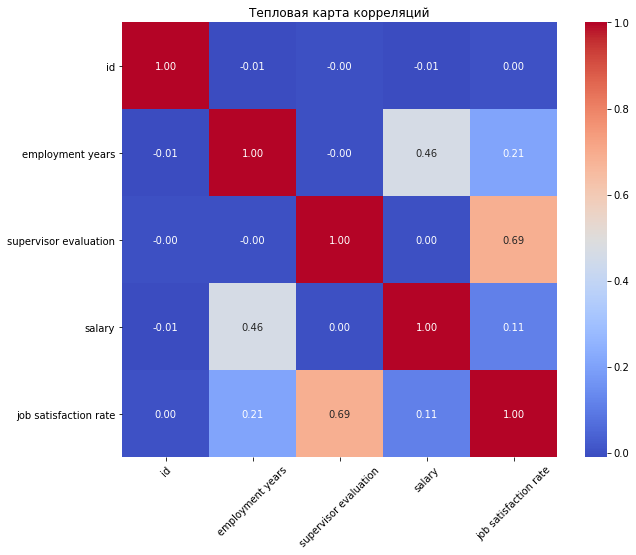

In [42]:
corr_matrix = train_job.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.xticks(rotation=45)
plt.title('Тепловая карта корреляций')
plt.show()

**Комментарий**: Заметно, что между тем сколько работает сотрудник в компании и тем сколько он получает есть небольшая связь. Также, между удовлетворённостью работой и оценкой сотрудника от руководителя тоже есть связь.

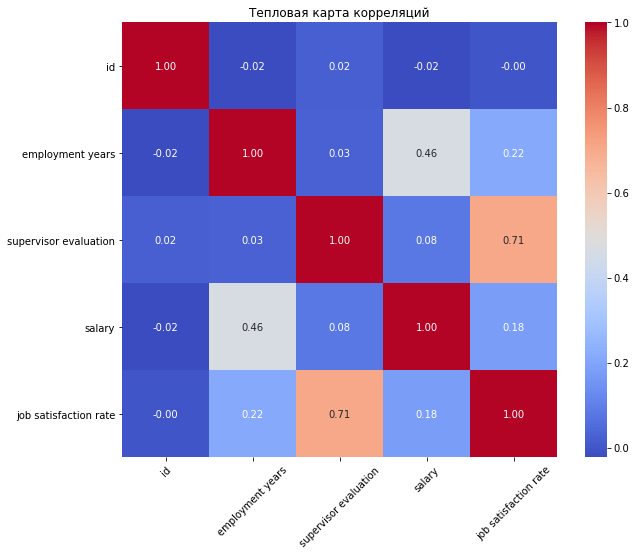

In [43]:
corr_matrix = test.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.xticks(rotation=45)
plt.title('Тепловая карта корреляций')
plt.show()

**Комментарий**: Тут такая же связь как и в предыдущем файле.

#### Вывод после исследовательского анализе и рекомендации по подготовке данных

##### `dept` (отдел)
- **Тип:** категориальный (`sales`, `technology`, `purchasing`, `marketing`, `hr`)
- **Рекомендации по подготовке:**  
  - Закодировать с помощью One-Hot Encoding (`pd.get_dummies`)
- **Примечание:** Распределение неравномерное, пропусков не видно.

---

#####  `level` (уровень)
- **Тип:** категориальный (`junior`, `middle`, `senior`)
- **Рекомендации по подготовке:**  
  - One-Hot Encoding или Ordinal Encoding (если требуется порядок)
- **Примечание:** Больше всего новичков, меньше всего — сотрудников с высоким уровнем.

---

#####  `workload` (загруженность)
- **Тип:** категориальный (`medium`, `low`, `high`)
- **Рекомендации по подготовке:**  
  - One-Hot Encoding или Ordinal Encoding (`low` < `medium` < `high`)
- **Примечание:** Преобладает средняя загруженность.

---

##### `employment years` (стаж)
- **Тип:** числовой (от 1 до 10)
- **Рекомендации по подготовке:**  
  - Масштабировать (например, StandardScaler/MinMaxScaler)
- **Примечание:** Много новых сотрудников, распределение с перекосом к малому стажу.

---

##### `last year promo` (повышение за прошлый год)
- **Тип:** бинарный (0/1)
- **Рекомендации по подготовке:**  
  - Оставить как есть
  - Учитывать сильный дисбаланс классов при моделировании
- **Примечание:** Почти все не были повышены.

---

#####  `last year violations` (нарушения за прошлый год)
- **Тип:** бинарный (0/1)
- **Рекомендации по подготовке:**  
  - Оставить как есть
  - Учитывать дисбаланс классов
- **Примечание:** Большинство не нарушали трудовой договор.

---

##### `supervisor evaluation` (оценка руководителя)
- **Тип:** числовой (от 1 до 5)
- **Рекомендации по подготовке:**  
  - Использовать как числовой признак
- **Примечание:** Наиболее частые оценки — 3 и 4.

---

##### `salary` (зарплата)
- **Тип:** числовой
- **Рекомендации по подготовке:**  
  - Масштабирование (StandardScaler, RobustScaler)
  - Для сглаживания распределения можно применить логарифмирование
- **Примечание:** Длинный правый хвост, большинство получают от 20 000 до 30 000.

---

##### `job satisfaction rate` (удовлетворённость работой)
- **Тип:** числовой (от 0 до 1)
- **Рекомендации по подготовке:**  
  - Использовать как есть
- **Примечание:** Распределение близко к нормальному, выбросов не видно.

---

### Подготовка данных

In [44]:
train_job = train_job.replace(' ', np.nan)

X_train = train_job.drop(['job satisfaction rate', 'id'], axis=1)
y_train = train_job['job satisfaction rate']

ord_col = ['level', 'workload']
ohe_col = ['dept', 'last year promo', 'last year violations'] 
num_col = ['salary', 'supervisor evaluation', 'employment years']

ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1, 
        categories=[
            ['junior', 'middle', 'senior'], 
            ['low', 'medium', 'high']       
        ]
    ))
])

preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_col),
    ('ord', ord_pipe, ord_col),
    ('num', MinMaxScaler(), num_col)
], remainder='drop')

### Обучение моделей

In [45]:
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_true - y_pred) / denominator) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=44))
])
param_dt = {
    'model__max_depth': range(2, 11),
    'model__min_samples_split': range(2, 11),
    'model__min_samples_leaf': range(1, 11),
    'preprocessor__num': ['passthrough']
}
search_dt = RandomizedSearchCV(pipe_dt, param_distributions=param_dt, n_iter=10, cv=3, scoring=smape_scorer, n_jobs=-1, random_state=44)
search_dt.fit(X_train, y_train)
print("DecisionTreeRegressor:")
print(search_dt.best_params_)
print("SMAPE:", abs(search_dt.best_score_))

pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
param_lr = {
    'model__fit_intercept': [True, False],
    'model__positive': [True, False],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}
search_lr = RandomizedSearchCV(pipe_lr, param_distributions=param_lr, n_iter=10, cv=3, scoring=smape_scorer, n_jobs=-1, random_state=44)
search_lr.fit(X_train, y_train)
print("LinearRegression:")
print(search_lr.best_params_)
print("SMAPE:", abs(search_lr.best_score_))

pipe_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR())
])
param_svr = {
    'model__kernel': ['rbf', 'linear'],
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.01, 0.1, 1],
    'preprocessor__num': [StandardScaler(), MinMaxScaler()]
}
search_svr = RandomizedSearchCV(pipe_svr, param_distributions=param_svr, n_iter=10, cv=3, scoring=smape_scorer, n_jobs=-1, random_state=44)
search_svr.fit(X_train, y_train)
print("SVR:")
print(search_svr.best_params_)
print("SMAPE:", abs(search_svr.best_score_))

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=44))
])
param_rf = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [3, 5, 7, 10],
    'model__min_samples_leaf': [1, 3, 5],
    'preprocessor__num': ['passthrough']
}
search_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_rf, n_iter=10, cv=3, scoring=smape_scorer, n_jobs=-1, random_state=44)
search_rf.fit(X_train, y_train)
print("RandomForestRegressor:")
print(search_rf.best_params_)
print("SMAPE:", abs(search_rf.best_score_))

DecisionTreeRegressor:
{'preprocessor__num': 'passthrough', 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 9}
SMAPE: 16.214018453700987
LinearRegression:
{'preprocessor__num': 'passthrough', 'model__positive': False, 'model__fit_intercept': False}
SMAPE: 24.59670407785413
SVR:
{'preprocessor__num': StandardScaler(), 'model__kernel': 'rbf', 'model__epsilon': 0.01, 'model__C': 1}
SMAPE: 14.270340348609684
RandomForestRegressor:
{'preprocessor__num': 'passthrough', 'model__n_estimators': 150, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
SMAPE: 14.546377469986167


**Комментарий**: Лучшей моделью оказалась `SVR`, `SMAPE` = `14.27`

In [46]:
X_test = test.drop(['job satisfaction rate'], axis=1)
y_test = test['job satisfaction rate']
y_pred = search_svr.predict(X_test)
test_smape = abs(smape(y_test, y_pred))
display(f'SMAPE на тестовой выборке: {test_smape}')
display(search_svr.best_estimator_)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'SMAPE на тестовой выборке: 13.443884925210718'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['dept', 'last year promo',
                                                   'last year violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['salary',
                                                   'supervisor evaluation',
                                                   'employment years'])])),
                ('model', SVR(C=1, epsilon=0.01))])

**Комментарий**: Метрика показала результат в `13.44` для модели `SVR` на тестовой выборке, а наше условие успеха, что SHAPE<=15 на тестовой выборке.

### Промежуточный вывод по 1 задаче

В ходе решения задачи были обучены и протестированы несколько моделей для предсказания уровня удовлетворённости сотрудника работой:

- Были рассмотрены различные модели, включая DecisionTreeRegressor, LinearRegression, RandomForestRegression, LogisticRegression, SVR
- Для всех моделей проводился подбор гиперпараметров и оценка качества с помощью метрики SMAPE.

**Результат лучшей модели**:
- Лучшая модель: SVR
- Значение SMAPE лучшей модели: на тренировочной выборке - `14.27`, на тестовой выборке - `13.44`


**Вывод:**  
Для предсказания уровня удовлетворённости сотрудников рекомендуется использовать модель SVR, так как она показала наименьшее значение SMAPE на тестовой выборке и обеспечивает более точные результаты.

## Задача №2

###  Загрузка данных

In [ ]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
test_target1 = pd.read_csv('/datasets/test_target_quit.csv')
test_data1 = pd.read_csv('/datasets/test_features.csv')
test_quit = test_data1.merge(test_target1, on='id', how='right')

### Предобработка данных

#### Предобработка данных из файла `train_quit.csv`

In [48]:
train_quit.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


**Комментарий**: В целом тут данные выглядят в порядке, только будет проведена замена символа `_` на пробел в названиях колонок

In [49]:
train_quit.columns = train_quit.columns.str.replace('_', ' ')

In [50]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment years       4000 non-null   int64 
 5   last year promo        4000 non-null   object
 6   last year violations   4000 non-null   object
 7   supervisor evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


**Комментарий**: Все типы данных соответствуют данным, пропусков не найдено.

In [51]:
train_quit.duplicated().sum()

0

**Комментарий**: Явных дубликатов в файле нет

In [52]:
display('dept', train_quit['dept'].value_counts())
display('level', train_quit['level'].value_counts())
display('workload', train_quit['workload'].value_counts())
display('last year promo', train_quit['last year promo'].value_counts())
display('last year violations', train_quit['last year violations'].value_counts())
display('quit', train_quit['quit'].value_counts())

'dept'

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

'level'

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

'workload'

medium    2118
low       1208
high       674
Name: workload, dtype: int64

'last year promo'

no     3887
yes     113
Name: last year promo, dtype: int64

'last year violations'

no     3455
yes     545
Name: last year violations, dtype: int64

'quit'

no     2872
yes    1128
Name: quit, dtype: int64

**Комментарий**: Лишних значений или неявных дубликатов не найдено

In [53]:
train_quit['level'] = train_quit['level'].str.replace('sinior', 'senior')

#### Предобработка данных из файла `test_target_quit.csv`

In [54]:
test_quit.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,no
1,686555,hr,junior,medium,1,no,no,4,30000,no
2,467458,sales,middle,low,5,no,no,4,19200,no
3,418655,sales,middle,low,6,no,no,4,19200,no
4,789145,hr,middle,medium,5,no,no,5,40800,no


**Комментарий**: Тут просто целевой признак `quit`, который показывает увольнение сотрудника

In [55]:
test_quit.columns = test_quit.columns.str.replace('_', ' ')

In [56]:
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment years       2000 non-null   int64 
 5   last year promo        2000 non-null   object
 6   last year violations   2000 non-null   object
 7   supervisor evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


**Комментарий**: Типы данных в порядке, пропуски такие же как и в первой задаче, решение будет таким же

In [57]:
display('dept', test_quit['dept'].value_counts())
display('level', test_quit['level'].value_counts())
display('workload', test_quit['workload'].value_counts())
display('last year promo', test_quit['last year promo'].value_counts())
display('last year violations', test_quit['last year violations'].value_counts())
test_quit['quit'].value_counts()

'dept'

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

'level'

junior    974
middle    854
sinior    171
Name: level, dtype: int64

'workload'

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

'last year promo'

no     1937
yes      63
Name: last year promo, dtype: int64

'last year violations'

no     1738
yes     262
Name: last year violations, dtype: int64

no     1436
yes     564
Name: quit, dtype: int64

**Комментарий**: Все как и в первой задаче

In [58]:
test_quit['level'] = test_quit['level'].replace('sinior', 'senior')

### Исследовательский анализ данных

#### Исследовательский анализ данных для `train_quit.csv`

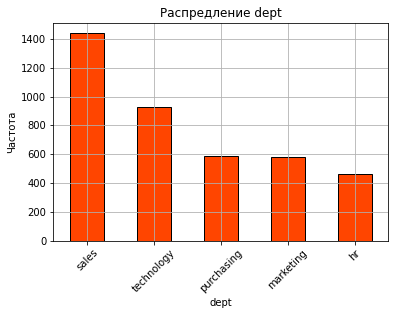

In [59]:
train_quit['dept'].value_counts().plot(kind='bar', color='orangered', edgecolor='black')
plt.title('Распредление dept')
plt.xlabel('dept')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Больше всего сотрудников работает в отделе `sales`. Менее загруженный отдел это `hr`

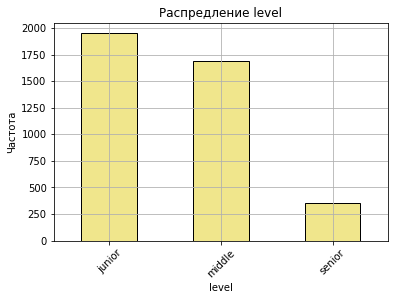

In [60]:
train_quit['level'].value_counts().plot(kind='bar', color='khaki', edgecolor='black')
plt.title('Распредление level')
plt.xlabel('level')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Больше всего сотрудников с маленьким опытом или недостаточным чтобы считаться довольно опытными сотрудниками,

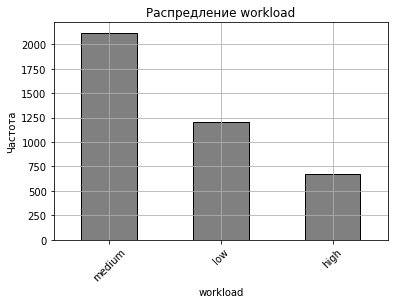

In [61]:
train_quit['workload'].value_counts().plot(kind='bar', color='gray', edgecolor='black')
plt.title('Распредление workload')
plt.xlabel('workload')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Большинство сотрудников имеют нормальную загруженность, тех кто имеет высокую загруженность меньше всех - `~700`

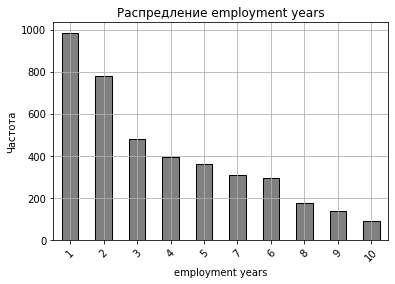

In [62]:
train_quit['employment years'].value_counts().plot(kind='bar', color='grey', edgecolor='black')
plt.title('Распредление employment years')
plt.xlabel('employment years')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: В компании мало тех кто работает в ней более `2-ух` лет, а тех кто работает `8-10` в разы меньше тех кто в компании `1-2` года.

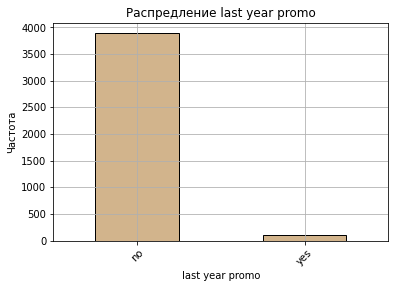

In [63]:
train_quit['last year promo'].value_counts().plot(kind='bar', color='tan', edgecolor='black')
plt.title('Распредление last year promo')
plt.xlabel('last year promo')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Лишь совсем малая часть сотрудников получила за последний год повышение

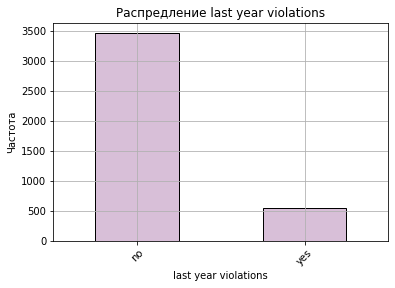

In [64]:
train_quit['last year violations'].value_counts().plot(kind='bar', color='thistle', edgecolor='black')
plt.title('Распредление last year violations')
plt.xlabel('last year violations')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Подавляющее число сотрудников не нарушали трудовой договор за последний год, однако тех кто это делал оказалось около `500` человек

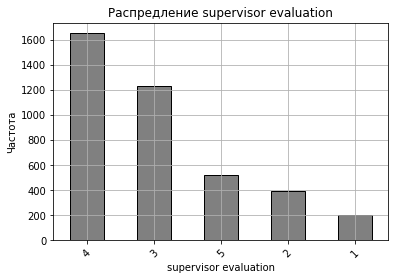

In [65]:
train_quit['supervisor evaluation'].value_counts().plot(kind='bar', color='gray', edgecolor='black')
plt.title('Распредление supervisor evaluation')
plt.xlabel('supervisor evaluation')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Большинство сотрудников получили оценку `4` или `3`, тех кто получил другую оценку намного меньше, а тех кто получил `1` меньше всех 

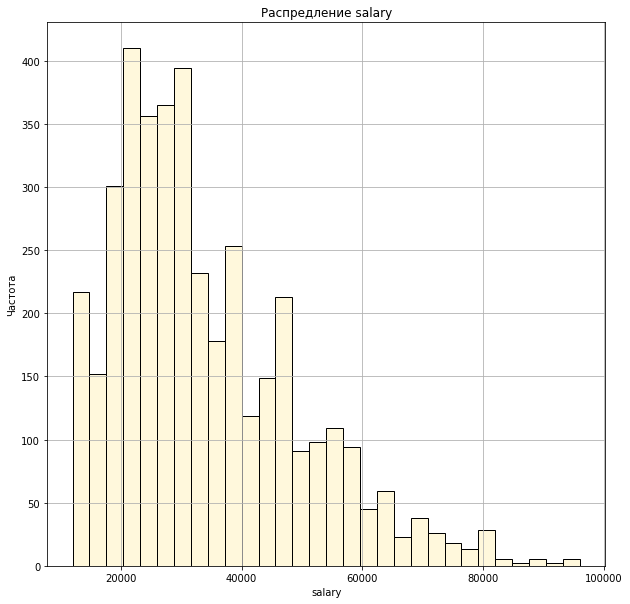

In [66]:
plt.figure(figsize=(10,10))
plt.hist(train_quit['salary'], bins=30, color='cornsilk', edgecolor='black')
plt.title('Распредление salary')
plt.xlabel('salary')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Комментарий**: Вновь также как и в первом файле, сотрудников с зарплатой `20000`-`30000` больше всего.

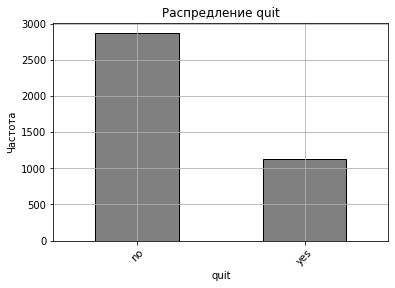

In [67]:
train_quit['quit'].value_counts().plot(kind='bar', color='gray', edgecolor='black')
plt.title('Распредление quit')
plt.xlabel('quit')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: На графике видно, что большинство сотрудников остались в компании, однако около `1100` сотрудников были уволены или ушли из компании.

#### Исследовательский анализ данных `test_target_quit.csv`

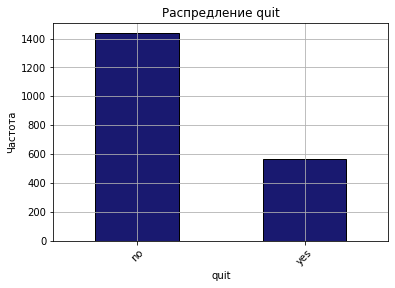

In [68]:
test_quit['quit'].value_counts().plot(kind='bar', color='midnightblue', edgecolor='black')
plt.title('Распредление quit')
plt.xlabel('quit')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Комментарий**: Тут ситуация похожая на ситуацию в `train_quit`, однако количество сотрудников в файлах различается, тех кто остался в компании около `1400`, а тех кто был уволен или ушел почти `600`  

#### Портрет уволившегося сотрудника

In [88]:
quit_by_dept = (
    train_quit
    .groupby('dept')['quit']
    .value_counts(normalize=True)
    .unstack()
    .sort_values(by='yes', ascending=False)
)

quit_by_dept['yes']

dept
technology    0.297414
sales         0.283032
purchasing    0.282313
marketing     0.280069
hr            0.250000
Name: yes, dtype: float64

**Комментарий**: Наибольшая относительная доля увольнений наблюдается в департаменте technology — почти 30%. Это означает, что почти каждый третий сотрудник в этом отделе покидает компанию. Также близки к этому уровню отделы sales, purchasing и marketing.

In [70]:
train_quit.loc[train_quit['quit']=='yes']['level'].value_counts()

junior    1003
middle     108
senior      17
Name: level, dtype: int64

**Комментарий**: Почти все ушедшие сотрудники были сотрудниками с уровнем `junior`, то есть совсем новенькими, те кто имеет средний уровень уходит в `10` раз реже чем люди с самым низким уровнем. А сотрудники с высоким уровнем должности, уходят еще в несколько раз реже чем остальные.

In [71]:
train_quit.loc[train_quit['quit']=='yes']['workload'].value_counts()

low       519
medium    488
high      121
Name: workload, dtype: int64

**Комментарий**: Тут уже что-то интересное, сотрудники с низким уровнем загруженности уходят чаще всего, хотя сотрудников со средней загруженностью намного больше чем с низкой, это может говорить о том что сотрудникам просто не интересно работать.

In [72]:
train_quit.loc[train_quit['quit']=='yes']['employment years'].value_counts()

1     599
2     290
3     163
4      27
5      23
6      10
7       7
8       3
9       3
10      3
Name: employment years, dtype: int64

**Комментарий**: Тут все ясно, чем меньше сотрудник находится в компании, тем выше вероятность того что он уволится

In [73]:
train_quit.loc[train_quit['quit']=='yes']['last year promo'].value_counts()

no     1127
yes       1
Name: last year promo, dtype: int64

**Комментарий**: Всё довольно наглядно, все сотрудники, которые покинули компанию не получали повышение за последний год

In [74]:
train_quit.loc[train_quit['quit']=='yes']['last year violations'].value_counts()

no     900
yes    228
Name: last year violations, dtype: int64

**Комментарий**: Большинство ушедших не нарушали трудовой договор за последний год, однако среди ушедших есть `228` сотрудников, которые все-так нарушили его и их число составляет почти половину всех сотрудников нарушивших трудовой договор за последний год

In [75]:
train_quit.loc[train_quit['quit']=='yes']['supervisor evaluation'].value_counts()

3    523
4    286
2    164
1     95
5     60
Name: supervisor evaluation, dtype: int64

**Комментарий**: Чего-то особенного тут нет, сотрудников ушедших с оценками `3` или `4` больше всего, т.к. в самой компании сотрудников с такими оценками больше всего.

In [76]:
train_quit.loc[train_quit['quit']=='yes']['salary'].mean()

23885.106382978724

**Комментарий**: Средняя зарплата ушедших сотрудников находится в нормальном диапозоне, она составляет - почти `24000`

In [77]:
train_quit.loc[train_quit['quit']=='no']['salary'].mean()

37702.22841225627

**Комментарий**: Для сравнения, средняя зарплата тех кто остался выше примерно на `14000`

#### Уровень удовлетворённости и увольнение

In [78]:
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment years       2000 non-null   int64 
 5   last year promo        2000 non-null   object
 6   last year violations   2000 non-null   object
 7   supervisor evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


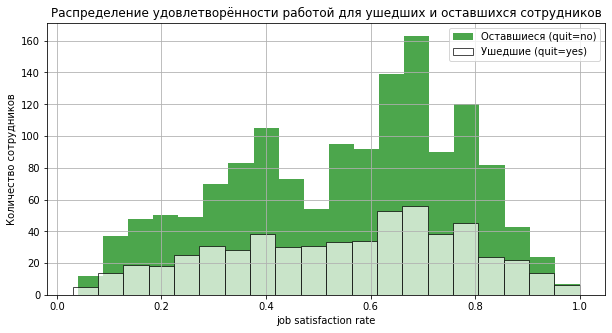

In [79]:
test_data = test_quit.copy()
test_data['job satisfaction rate'] = test['job satisfaction rate'].values

plt.figure(figsize=(10,5))
plt.hist(
    test_data.loc[test_data['quit'] == 'no', 'job satisfaction rate'],
    bins=20, alpha=0.7, label='Оставшиеся (quit=no)', color='green'
)
plt.hist(
    test_data.loc[test_data['quit'] == 'yes', 'job satisfaction rate'],
    bins=20, alpha=0.7, label='Ушедшие (quit=yes)', color='white', edgecolor='black'
)
plt.xlabel('job satisfaction rate')
plt.ylabel('Количество сотрудников')
plt.title('Распределение удовлетворённости работой для ушедших и оставшихся сотрудников')
plt.legend()
plt.grid(True)
plt.show()

**Комментарий**: Среди ушедших сотрудников доля людей с низкой удовлетворённостью работой заметно выше, однако и среди оставшихся в компании встречаются сотрудники с низким уровнем удовлетворённости. В целом, чем ниже удовлетворённость, тем выше вероятность увольнения, но этот фактор не является единственным — часть сотрудников с низким `job satisfaction rate` всё же продолжает работать, а с высокоим могут и уйти. Таким образом, низкая удовлетворённость увеличивает риск ухода, но не всегда приводит к увольнению.

### Добавление нового входного признака

In [90]:
features_no_satisfaction = [
    'dept', 'workload', 'level', 'last year promo', 'last year violations',
    'employment years', 'salary', 'supervisor evaluation'
]
X_train_0 = train_quit[features_no_satisfaction]
y_train = train_quit['quit'].replace({'yes': 1, 'no': 0})
X_test_0 = test_quit[features_no_satisfaction]

search_svr.fit(X_train_0, y_train)
train_quit['job satisfaction rate'] = search_svr.predict(X_train_0)
test_quit['job satisfaction rate'] = search_svr.predict(X_test_0)
features_full = [
    'dept', 'workload', 'level', 'last year promo', 'last year violations',
    'employment years', 'salary', 'supervisor evaluation', 'job satisfaction rate'
]
X_train = train_quit[features_full]
X_test = test_quit[features_full]
y_train = train_quit['quit'].replace({'yes': 1, 'no': 0})
y_true = test_quit['quit'].replace({'yes': 1, 'no': 0}).reset_index(drop=True)


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Подготовка данных

In [92]:
train_quit = train_quit.replace(' ', np.nan)
test_quit = test_quit.replace(' ', np.nan)

categorical_onehot = ['dept', 'last year promo', 'last year violations']  # исключаем level и workload
categorical_ordinal = ['level', 'workload']
numeric_features = ['employment years', 'salary', 'supervisor evaluation', 'job satisfaction rate']


categorical_onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

categorical_ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1,
        categories=[
            ['junior', 'middle', 'senior'],   # для 'level'
            ['low', 'medium', 'high']         # для 'workload'
        ]
    ))
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat_onehot', categorical_onehot_pipeline, categorical_onehot),
    ('cat_ord', categorical_ordinal_pipeline, categorical_ordinal),
    ('num', numeric_pipeline, numeric_features)
])

### Обучение модели

In [94]:
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=44))
])
pipe_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=44))
])
pipe_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(solver='liblinear', random_state=44))
])

param_rf = {'model__n_estimators': [100, 200], 'model__max_depth': [3, 5, 7], 'model__min_samples_split': [2, 5, 10]}
param_gb = {'model__n_estimators': [100, 200], 'model__max_depth': [3, 5], 'model__learning_rate': [0.05, 0.1]}
param_logreg = {'model__C': [0.01, 0.1, 1, 5, 10], 'model__penalty': ['l1', 'l2']}

search_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_rf, n_iter=6, cv=3, scoring='roc_auc', random_state=44)
search_rf.fit(X_train, y_train)

search_gb = RandomizedSearchCV(pipe_gb, param_distributions=param_gb, n_iter=6, cv=3, scoring='roc_auc', random_state=44)
search_gb.fit(X_train, y_train)

search_logreg = RandomizedSearchCV(pipe_logreg, param_distributions=param_logreg, n_iter=6, cv=3, scoring='roc_auc', random_state=44)
search_logreg.fit(X_train, y_train)
print(f"Random Forest CV ROC AUC: {search_rf.best_score_}")
print(f"Gradient Boosting CV ROC AUC: {search_gb.best_score_}")
print(f"Logistic Regression CV ROC AUC: {search_logreg.best_score_}")

Random Forest CV ROC AUC: 0.9425034319348257
Gradient Boosting CV ROC AUC: 0.9415528776763263
Logistic Regression CV ROC AUC: 0.9369133396559314


**Комментарий**: Метрика модели `RandomForest` составляет `0.9425034319348257`, что является очень высоким результатом, но надо посмотреть на значения на тестовой выборке

In [97]:
features = [
    'dept', 'workload', 'level', 'last year promo', 'last year violations',
    'employment years', 'salary', 'supervisor evaluation', 'job satisfaction rate'
]

X_test = test_quit[features]
y_true = test_quit['quit'].replace({'yes': 1, 'no': 0}).reset_index(drop=True)
y_proba = search_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_true, y_proba)
print(roc_auc)


0.9253133704735377


**Комментарий**: Метрика на тестовой выборке равна `0.93`, что для вполне удовлетворительно

# ✅ Финальный вывод по проекту

В ходе выполнения проекта были решены две задачи:

---

# 🟩 Задача 1: Предсказание уровня удовлетворённости работой (регрессия)

- Проведена обработка данных и подбор моделей: `LinearRegression`, `RandomForestRegressor`, `SVR` и другие.
- Лучшие результаты показала модель **SVR**.
- SMAPE:
  - на тренировочной выборке: **14.27**
  - на тестовой выборке: **13.44**

➡️ **Вывод:** Модель `SVR` обеспечивает наименьшую ошибку и рекомендуется для прогнозирования удовлетворённости сотрудников.

---

# 🟦 Задача 2: Предсказание увольнения сотрудника (классификация)

- Обучены модели `RandomForestClassifier`, `GradientBoostingClassifier`, `LogisticRegression`.
- По результатам кросс-валидации и тестирования лучшей оказалась модель **RandomForestClassifier**.
- ROC-AUC:
  - на тренировочной выборке: **0.9425**
  - на тестовой выборке: **0.93**

➡️ **Вывод:** Модель `RandomForestClassifier` продемонстрировала высокое качество предсказания и может использоваться для оценки вероятности увольнения сотрудников.

---

🎯 **Общий итог:**  
В проекте были успешно решены задачи регрессии и классификации. Построены точные модели, пригодные для прогнозов в HR-аналитике.
